In [4]:
def SDCTD_stevilo(g):
    h = g.complement()

    p = MixedIntegerLinearProgram(maximization = False)
    x = p.new_variable(binary = True)
    p.set_objective(sum([x[v] for v in g]))

    for v in g.vertices():
        neighbors = g.neighbors(v)  
        p.add_constraint(x[v] + sum(x[w] for w in neighbors) >= 1)

    zaustavi = False

    for v in g.vertices():
        neighbors_complement = h.neighbors(v)  
        if neighbors_complement:  
            p.add_constraint(sum(x[w] for w in neighbors_complement) >= 1)

        else: 
            zaustavi = True
            break 

    if not zaustavi == True:
        p.solve()
        x = p.get_values(x)
        return(sum(1 for i in x.values() if i == 1))
    else:
        return None

In [5]:
from random import choice

def max_random(n):
    # Ustvari naključni graf z n vozlišči in gostoto povezav 0.5
    G = graphs.RandomGNP(n, 0.5)
    
    # Začetno SDCTD število
    max_stevilo = SDCTD_stevilo(G)

    # Funkcija za naključno spremembo povezave
    def spremenipovezavo(G):
        # Pridobi obstoječe povezave in manjkajoče povezave
        edges = G.edges(labels=False)
        non_edges = [(u, v) for u in G.vertices() for v in G.vertices() if u < v and not G.has_edge(u, v)]

        # Kopiraj graf za spremembo
        H = G.copy()

        # Naključno dodaj ali odstrani povezavo
        if edges and non_edges:
            if choice([True, False]):  # 50% verjetnost za odstranitev
                edge_odstrani = choice(edges)
                H.delete_edge(edge_odstrani)
            else:  # 50% verjetnost za dodajanje
                edge_dodaj = choice(non_edges)
                H.add_edge(edge_dodaj)
        elif edges:
            edge_odstrani = choice(edges)
            H.delete_edge(edge_odstrani)
        elif non_edges:
            edge_dodaj = choice(non_edges)
            H.add_edge(edge_dodaj)

        return H

    # dolocino stevilo iteracij za spreminjanje povezav
    for i in range(150000):
        H = spremenipovezavo(G)  # Spremeni graf
        
        # Preveri, če je SDCTD število veljavno in večje
        if H.is_connected():
            novo_stevilo = SDCTD_stevilo(H)  # Izračunaj SDCTD število za H
            if  novo_stevilo is not None and novo_stevilo > max_stevilo:
                max_stevilo = novo_stevilo  # Posodobi maksimalno SDCTD število
            G = H # Nadomesti graf G z grafom H
            prikaz = H
    prikaz.show()
    return max_stevilo


In [10]:
def min_random(n):
    # Ustvari popoln graf z n vozlišči
    G = graphs.RandomGNP(n, 0.5)
    min_stevilo = SDCTD_stevilo2(G)  # Začetno SDCTD število

    # Funkcija za naključno spremembo povezave
    def spremenipovezavo(G):
        # Pridobi obstoječe povezave in manjkajoče povezave
        edges = G.edges(labels=False)
        non_edges = [(u, v) for u in G.vertices() for v in G.vertices() if u < v and not G.has_edge(u, v)]

        # Kopiraj graf za spremembo
        H = G.copy()

        # Naključno dodaj ali odstrani povezavo
        if edges and non_edges:
            if choice([True, False]):  # 50% verjetnost za odstranitev
                edge_odstrani = choice(edges)
                H.delete_edge(edge_odstrani)
            else:  # 50% verjetnost za dodajanje
                edge_dodaj = choice(non_edges)
                H.add_edge(edge_dodaj)
        elif edges:
            edge_odstrani = choice(edges)
            H.delete_edge(edge_to_remove)
        elif non_edges:
            edge_to_add = choice(non_edges)
            H.add_edge(edge_to_add)

        return H

    # dolocimo stevilo iteracij za spreminjanje povezav
    for i in range(50000):
        H = spremenipovezavo(G)  # Spremeni graf
        current_stevilo = SDCTD_stevilo2(H)  # Izračunaj SDCTD število za H
        if H.is_connected(): #ce ni povezan ga sploh ne obravnavamo ker bo to spremenilo potek algoritma
            if current_stevilo is not None and current_stevilo < min_stevilo:
                min_stevilo = current_stevilo # Posodobi minimalno SDCTD število
            G = H  # Nadomesti graf G z grafom H
            prikaz = H
    prikaz.show()
    return min_stevilo


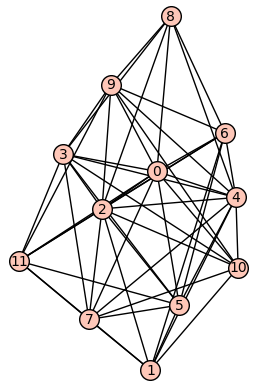

12


In [10]:
for i in range(1):
    print(max_random(12))

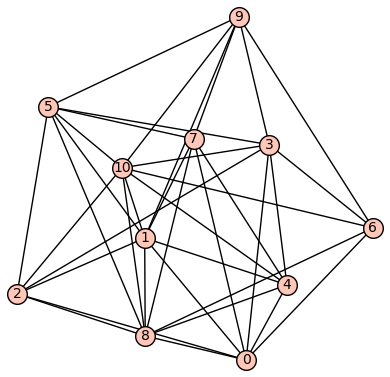

10

In [6]:
max_random(11)

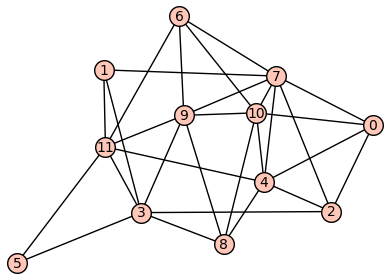

2

In [11]:
min_random(12)